# Data Cleaning and EDA

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import numpy as np
import math
import glob
import seaborn as sns
from nltk.corpus import stopwords

## 1. Read in Data

I iteratively stored songs into different CSVs during scraping to avoid losing data if my computer shut down. So  we'll want to read all these files and combine them into one

In [62]:
# Combine csvs
all_files=glob.glob("/Users/eshantarneja/Documents/DataScience/data/rawData/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, encoding='latin-1')
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,url,new_x,new_y,chordOrder,chordList,topInfo,songArtist
0,https://tabs.ultimate-guitar.com/tab/dolly-parton/its-all-wrong-but-its-all-right-chords-2113377,['Country'],[1970],"['G', 'C', 'G', 'C', 'D', 'G', 'C', 'G', 'C', 'D', 'G', 'C', 'G', 'C', 'D', 'G', 'C', 'G', 'C', 'D', 'G', 'G', 'C', 'G', 'C', 'D', 'G', 'C', 'G']","['G', 'C', 'D']",[],Its All Wrong But Its All Right chords by Dolly Parton
1,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-1099394,"['Country', 'Folk', 'Folk']","[1970, 1970, 1940]","['Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am']","['Am', 'C', 'G']","['Difficulty: intermediate', 'Tuning: E A D G B E', 'Capo: 4th fret']",Jolene chords by Dolly Parton
2,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-1233293,['Country'],[1970],"['Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'Em', 'G', 'D', 'Em', 'D', 'Em', 'D', 'Em']","['Em', 'G', 'D']","['Difficulty: novice', 'Tuning: E A D G B E', 'Capo: 4th fret']",Jolene chords by Dolly Parton
3,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-165569,"['Country', 'Folk']","[1970, 1970]","['Dm', 'F', 'C', 'Dm', 'C', 'Dm', 'F', 'C', 'Dm', 'C', 'Dm', 'Dm', 'F', 'C', 'Dm', 'C', 'Dm', 'Dm', 'F', 'C', 'Dm', 'C', 'Dm', 'Dm', 'F', 'C', 'Dm', 'C', 'Dm', 'Dm', 'F', 'C', 'Dm', 'C', 'Dm']","['Dm', 'F', 'C']",[],Jolene chords by Dolly Parton
4,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-183019,"['Country', 'Country', 'Folk', 'Folk']","[1970, 1940, 1970, 1940]","['Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'Am', 'C', 'G', 'Am', 'G', 'Em', 'Am']","['Am', 'C', 'G', 'Em']","['Difficulty: novice', 'Tuning: E A D G B E', 'Capo: 4th fret', 'Key: C#m']",Jolene chords by Dolly Parton


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 7 columns):
url           9997 non-null object
new_x         9997 non-null object
new_y         9997 non-null object
chordOrder    9997 non-null object
chordList     9997 non-null object
topInfo       9997 non-null object
songArtist    9997 non-null object
dtypes: object(7)
memory usage: 546.8+ KB


## 2. Clean up Low Hanging Fruit

My data set was quite expansive, but it was rather dirty. Before getting into any analysis I needed to do some basic cleaning. There is more cleaning to come throughout the analysis as I identified more errors, so this section is focused more instead on cleaning up the low hanging fruit.

There are a couple of issues within this raw data that I can see just by looking at it. Lets clean those up to start.

1. Song and Artist are in a field together (i.e Dust Bowl chords by 10,000 Maniacs). We'll want to seperate these into their own fields

2. All of the lists got read in as strings. I can see that by all of them being read as "objects". I learned that reading and writing in csvs loses python formatting (this is what pckl files are great for apparently...I had always heard of these...never knew why people used them). I'll go ahead and convert those back into lists though.

3. The topInfo column has really disparate information about the song. This data is found at the top of the chord page and usually contains Key, Capo, and Tuning...but sometimes has only some of that info, and also sometimes has random facts about the song. I'll break these into their own fields if they exist, and if there is extra info, I'll put it in a column called "other"

4. I know from my original file combining that there are quite a few duplicates in the data. I.e these Urls were found in multiple genres and decades, but have the exact same tab (shown by url). That is why the genre and decades are stored as list because I combined all the info from each of these into one before scraping the song to avoid duplicate work. I'll take the unique set of genres and decades for each entry. I.e ["Folk","Folk", "Rock", "Rock"] -> ["Folk", "Rock"]. I'll decide what to do with multiple genres/decades later...

In [64]:
def cleanSongArtist(raw):
#     takes in songArtist field and splits into Song and Artist columns seperately
    song=np.NaN
    artist=np.NaN
    saList=raw.split(" chords by ")
    if len(saList)==2:       
        song=saList[0]
        artist=saList[1]
    return pd.Series([song,artist])


def stringToList(row):
#     all lists were read into CSVS as strings. Use literal eval to convert back to list format
    chordList=literal_eval(row['chordList'])
    chordOrder=literal_eval(row['chordOrder'])
    songInfo=literal_eval(row['topInfo'])
    genre=literal_eval(row['new_x'])
    decade=literal_eval(row['new_y'])
    return pd.Series([chordList, chordOrder, genre, decade, songInfo])


def cleanSongInfo(songInfo):
#     break songInfo field into its parts
    diff = np.NaN
    tuning = np.NaN
    capo = np.NaN
    key = np.NaN
    other = np.NaN
# loop through since some values may be missing (i.e no capo listed). weird values stored in the "other" column
    if type(songInfo)==int:
        print(songInfo)
    for i in songInfo:
        infoList=i.split(': ')
        if len(infoList)==2:
            infoType=infoList[0]
            value=infoList[1]
            if infoType=='Difficulty':
                diff=value
            elif infoType=='Tuning':
                tuning=value
            elif infoType=='Capo':
                capo=value
            elif infoType=='Key':
                key=value
            else:
                other=i
        else:
            other=i            
    return pd.Series([diff, tuning, capo, key, other])

# remove duplicate genre and decades from data
def removeDuplicates(row):
    decade=list(set(row['decade']))
    genre=list(set(row['genre']))
    return pd.Series([decade, genre])

# def cleanUrl(rawUrl):
#     urlList=rawUrl.split('/')
#     urlShort=urlList[4:6]
#     artistName=urlShort[0].replace('-',' ')
#     songName=urlShort[1].split('-chords')[0].replace('-',' ')
#     return pd.Series([artistName, songName])



# df[['artistName', 'songName']]=df.url.apply(cleanUrl)
df[['song','artist']]=df.songArtist.apply(cleanSongArtist)
df[['chordList', 'chordOrder', 'genre', 'decade', 'songInfo']]=df.apply(stringToList, axis=1)
df[['difficulty', 'tuning', 'capo', 'key','other']]=df.songInfo.apply(cleanSongInfo)
df[['decade','genre']]=df.apply(removeDuplicates, axis=1)
df.drop(['new_x', 'new_y', 'songInfo', 'topInfo', 'songArtist'], axis=1, inplace=True)
df.rename(columns={'chordList':'uniqueChords'},inplace=True)


df.head()   


,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other
0,https://tabs.ultimate-guitar.com/tab/dolly-parton/its-all-wrong-but-its-all-right-chords-2113377,"[G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, G, G, C, G, C, D, G, C, G]","[G, C, D]",Its All Wrong But Its All Right,Dolly Parton,[Country],[1970],NaN,NaN,NaN,NaN,NaN
1,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-1099394,"[Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am]","[Am, C, G]",Jolene,Dolly Parton,"[Folk, Country]","[1970, 1940]",intermediate,E A D G B E,4th fret,NaN,NaN
2,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-1233293,"[Em, G, D, Em, D, Em, Em, G, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, D, Em]","[Em, G, D]",Jolene,Dolly Parton,[Country],[1970],novice,E A D G B E,4th fret,NaN,NaN
3,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-165569,"[Dm, F, C, Dm, C, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm]","[Dm, F, C]",Jolene,Dolly Parton,"[Folk, Country]",[1970],NaN,NaN,NaN,NaN,NaN
4,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-183019,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[Am, C, G, Em]",Jolene,Dolly Parton,"[Folk, Country]","[1970, 1940]",novice,E A D G B E,4th fret,C#m,NaN


## 3. EDA

Let's now do a basic exploratory analysis of our data, we could have to clean up some more as we expose more issues. The main focus of this analysis is on the chords, however I want to get a baseline understanding of this data set first, so I'll step through each field one by one until we reach the chords...we'll go more in depth once we arrive at the chords.

### Decades

We'll start with the decades field. Lets see the breakdown of how much of our data is from each decade. From the start, it seems a bit weird that we have tabs with multiple decades...that could be something to look into here as well.

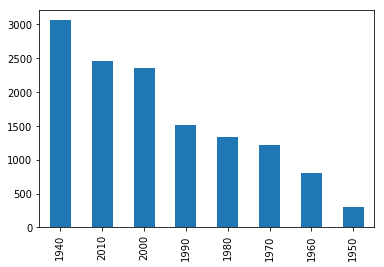

In [65]:
pd.Series(df.decade.sum()).value_counts().plot(kind="bar")

Wow, lots of 1940's....seems a bit off. After a quick check on the ultimate guitar website I realized that there are no 1940's chords at all. Turns out there was a bug in my web scraper that was adding in that date as a filter. I should have only been going back to 1950. 

This might explain why there are multiple decades for some songs. A song can only be from one decade. Lets see if all of these multi-decade songs have a 1940 in them.

In [66]:
a=df[df['decade'].map(len)>1]
print('Entries with multiple decade values: ', a.size)
mask = a.decade.apply(lambda x: 1940 in x)
print('Multiple decade values that contain 1940: ', a[mask].size)
newCol=a['decade'].map(len)
print('Maximum length of duplicate values: ', max(newCol))

Entries with multiple decade values:  36528
Multiple decade values that contain 1940:  36528
Maximum length of duplicate values:  2


Awesome news...all of these entries that have multiple decade values have 2 decades in their list, and one of those decades is a 1940. Also, when I check out those filters on ultimate guitar, it seems all of the rest of the info is correct...so all I need to do is remove the "1940" decade tag from them and the rest of the data is still good values. We shouldn't have any more duplicate decades after that.

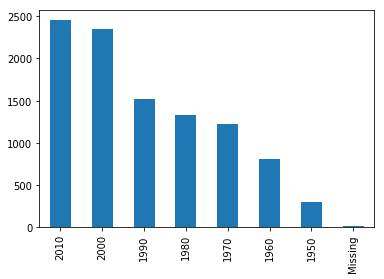

In [67]:
# remove 1940s from data. found during initial data analysis that these values were brought in incorrectly...no 1940 data online. when scraping for 1940 it just removes that filter but keeps the other (genre)
def removeFourtys(decades):
    newList=[]
    for dec in decades:
        if dec!=1940:
            newList.append(dec)
    if len(newList)>0:
        return str(max(newList))
    else:
        return np.NaN

df['decade']=df.decade.apply(removeFourtys)
df.fillna('Missing').decade.value_counts().plot(kind='bar')


Much better...After removing 1940 as a possible decade, we see that most of our tabs are from recent decades. The amount of tabs decreases as we go further back in time. There are a couple of tabs now missing decades since all they had were "1940". We can either clean those up by hand or just remove them...

(PS I've also gone ahead and fixed that bug in my scraper in case any one else wants to use it!) 

### Genres

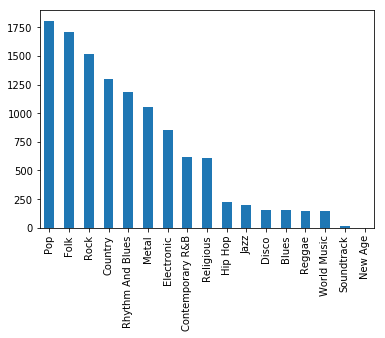

In [68]:
pd.Series(df.genre.sum()).value_counts().plot(kind="bar")

Similar to decades, a song potentially has multiple genres. However, unlike decades, having multiple genres is definitely possible. 

Entries with multiple genre values:  18636


Text(0, 0.5, 'Count')

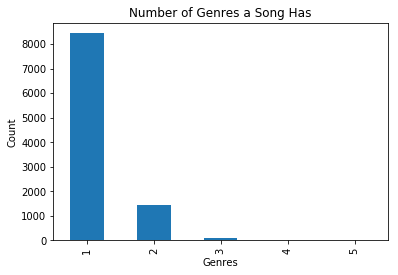

In [69]:
a=df[df['genre'].map(len)>1]
print('Entries with multiple genre values: ', a.size)
# newCol=a['genre'].map(len)
# print('Maximum length of duplicate values: ', max(newCol))
ax =df['genre'].map(len).value_counts().plot(kind='bar', title='Number of Genres a Song Has')
ax.set_xlabel("Genres")
ax.set_ylabel("Count")

So most songs only have one genre, but we still have quite a few with multiple (some even have 5). There's no reason to try and choose one genre for each song, as it could be interesting to to explore songs that cross genres, how they are related, etc. However, a list may not be the best format for comparing them. Lets try and see what the most popular crossover genres are. We will transform the field to be a sorted tuple for direct comparisons and hashing ability.

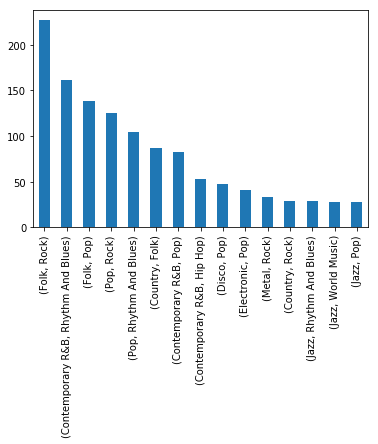

In [70]:
df['genre']=df.genre.apply(sorted).apply(tuple)
df[df['genre'].map(len)>1]['genre'].value_counts().sort_values(ascending=False).head(15).plot(kind='bar')

These all seem legit! 

Another thing I'm interested to see is how our decades and genres are related. I would assume that most of our Pop songs are from 2000's on, and Jazz would be earlier on. Lets try to graph this breakdown. It will be a good excercise in playing with pandas group by's as well

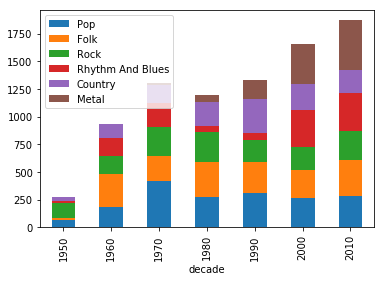

In [71]:
groups=df.groupby('decade')['genre'].apply(lambda x: list(x)).apply(lambda x: [item for sublist in x for item in sublist]).apply(lambda x: pd.Series(x).value_counts())
groups[['Pop','Folk','Rock','Rhythm And Blues','Country','Metal']].plot(kind='bar', stacked=True)

Nevermind! There actually is a fairly even split among all decades. This is honestly unexpected. This means that when I filtered on UG by "2010+Pop", I recieved a similar amount of data for the filter "1980+Pop". This is great that we have a balanced data set though! That was one of the reasons of scraping in the way I did.

### Songs and Artists

Lets take a look at our artists first. I wonder how many diferent artists we have in this dataset?

In [72]:
print("Unique artists in data set: ", df.artist.nunique())

Unique artists in data set:  872


Interesting, so we only have 872 unique artist, but we have over 10000 tabs. That means we have multiple songs per artist. Lets see which artists have the most songs in our dataset

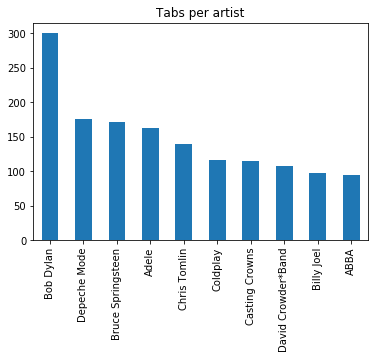

In [73]:
df.artist.value_counts().head(10).plot(kind='bar', title='Tabs per artist')

In [74]:
# df.artist.value_counts().plot(kind='hist', bins=25,title='Tabs per artist', edgecolor='k')
# ax = sns.distplot(df.artist.value_counts(),bins=25 ,hist=True, color='b',hist_kws=dict(edgecolor="k", linewidth=2))
# plt.title('Distribution of Tab Count Per Artist') 
# plt.ylabel('Frequency')
# plt.xlabel('Tab Count')

Lets look at the top artist from this group, Bob Dylan, to get an idea of what a breakdown of all his songs are

number of bob dylan songs with tabs:  152
number of bob dylan songs with multiple versions:  80


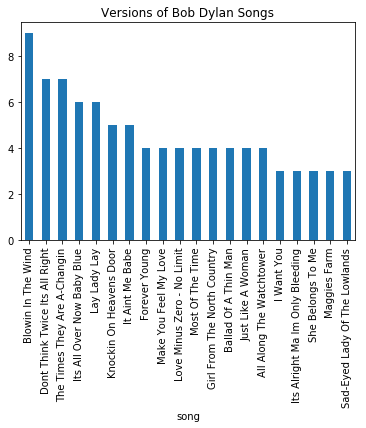

In [75]:
dylan=df[df['artist']=="Bob Dylan"]
dylanSongs=dylan.groupby('song').size().sort_values(ascending=False)
print("number of bob dylan songs with tabs: ", len(dylanSongs))
print("number of bob dylan songs with multiple versions: ",len(dylanSongs[dylanSongs>1]) )
dylanSongs.head(20).plot(kind='bar', title="Versions of Bob Dylan Songs")

lets look specifically into Blowing in the Wind to see what the differences are

In [76]:
dylan[dylan['song']=='Blowin In The Wind']

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other
4996,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-1086954,"[D, D, G, D, G, D, D, G, D, G, A, D, G, D, G, D, G, A, D, Bm, G, A, D, G, A, D, Bm, G, A, D, D, G, D, G, D, D, G, D, G, A, D, G, D, G, D, G, A, D, Bm, G, A, D, G, A, D, Bm, G, A, D, D, G, D, G, D, D, G, D, G, A, D, G, D, G, D, G, A, D, Bm, G, A, D, G, A, D, Bm, G, A, D]","[D, G, A, Bm]",Blowin In The Wind,Bob Dylan,"(Folk, Rock)",1960,novice,NaN,NaN,D,NaN
4997,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-147936,"[C, F, C, Am, C, F, G, G7, C, F, C, Am, C, F, G, G7, C, F, C, Am, C, F, G, F, G, C, E7, Am, F, G, C, C, F, C, Am, C, F, G, G7, C, F, C, Am, C, F, G, G7, C, F, C, Am, C, F, G, G7, F, G, C, E7, Am, F, G, C, C, F, C, Am, C, F, G, G7, C, F, C, Am, C, F, G, G7, C, F, C, Am, C, F, G, G7, F, G, C, E7, Am, F, G, C]","[C, F, Am, G, G7, E7]",Blowin In The Wind,Bob Dylan,"(Folk, Rock)",1960,NaN,E A D G B E,NaN,NaN,NaN
4998,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-14835,"[G, C, D, G, C, G, G, C, D, G, C, D, G, C, D, G, C, G, C, D, G, C, D, G, C, D, G, C, C, D, G, G, C, D, G, C, G, G, C, D, G, C, D, G, C, D, G, C, G, C, D, G, C, D, G, C, D, G, C, C, D, G, G, C, D, G, C, G, G, C, D, G, C, D, G, C, D, G, C, G, C, D, G, C, D, G, C, D, G, C, C, D, G]","[G, C, D]",Blowin In The Wind,Bob Dylan,"(Folk, Rock)",1960,novice,E A D G B E,7th fret,D,NaN
4999,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-14845,"[C, D, G, C, D, G, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D, G, C, D]","[C, D, G]",Blowin In The Wind,Bob Dylan,"(Folk, Rock)",1960,NaN,NaN,NaN,NaN,NaN
5000,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-1813913,"[G, C, G, C, G, G, C, G, C, D, G, C, G, C, G, C, D, G, Em, C, D, G, C, D, G, Em, C, D, G, G, C, G, C, G, G, C, G, C, D, G, C, G, C, G, C, D, G, Em, C, D, G, C, D, G, Em, C, D, G, G, C, G, C, G, G, C, G, C, D, G, C, G, C, G, C, D, G, Em, C, D, G]","[G, C, D, Em]",Blowin In The Wind,Bob Dylan,"(Folk, Rock)",1960,novice,E A D G B E,6th fret,NaN,NaN
5001,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-2273011,"[G, G, C, G/B, D/A, G, G, C, G/B, G, G, C, G/B, D/A, G, G, C, G/B, D/A, G, C, G/B, D/A, G, G, C, G/B, G, C, C/B, D/A, D/F#, G, C, C/G, C, C/B, D/A, G, C, C/B, D/A, D/F#, G, C, C/G, C, C/B, D/A, G, G, G, C, G/B, D/A, G, G, C, G/B, G, G, C, G/B, D/A, G, G, C, G/B, D/A, G, C, G/B, D/A, G, G, C, G/B, G, C, C/B, D/A, D/F#, G, C, C/G, C, C/B, D/A, G, C, C/B, D/A, G, C, C/G, C, C/B, D/A, D/F#, G, ...]","[G, C, G/B, D/A, C/B, D/F#, C/G, D]",Blowin In The Wind,Bob Dylan,"(Folk,)",1960,intermediate,E A D G B E,7th fret,D,"Chords for the classic acoustic version from ""The Freewheelin' Bob Dylan"": https://www.youtube.com/watch?v=MMFj8uDubsE / intermediate with split chords - including the bass line played on the 5th and 6th string. Was this info helpful?YesNo"
5002,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-660670,"[D, D, G, A, D, G, D, G, A, D, G, A, D, G, A, D, G, D, G, A, D, Bm, G, A, D, G, A, D, Bm, G, A, D, D, G, A, D, G, D, G, A, D, G, A, D, G, A, D, G, D, G, A, D, Bm, G, A, D, G, A, D, Bm, G, A, D, D, G, A, D, G, D, G, A, D, G, A, D, G, A, D, G, D, G, A, D, Bm, G, A, D, G, A, D, Bm, G, A, D]","[D, G, A, Bm]",Blowin In The Wind,Bob Dylan,"(Folk,)",1960,NaN,E A D G B E,NaN,NaN,NaN
5003,https://tabs.ultimate-guitar.com/tab/bob-dylan/blowin-in-the-wind-chords-771892,"[G, C, G, C, G, G, C, G, C, D, G, C, G, C, G, C, D, G, C, C, D, G, C, D, G, C, C, D, G, G, C, G, C, G, G, C, G, C, D, G, C, G, C, G, C, D, G, C, C, D, G, G, C, G, G, C, G, G, C, G, G, C, D, G, C, G, G, C, G, C, D, G, C, C, D, G]","[G, C, D]",Blowin In The Wind,Bob Dylan,"(Folk,)",1960,NaN,E A D G B E,NaN,NaN,NaN
5004,https://ta

Interesting, so looks like there are 9 pretty different versions of the same song. There are a few basic versions where the songs only use C D and G. Theres another version with D G A and Bm. Theres also an intermediate version with some more unique chords...

Lets look at these multi-versioned songs on a higher level.

In [77]:
songArtist=df.groupby(['song','artist']).size().sort_values(ascending=False)
print("Number of unique songs in db: ", len(songArtist))
print("Number of songs that have multiple versions: ", songArtist[songArtist>1].sum())

Number of unique songs in db:  6365
Number of songs that have multiple versions:  5564


Interesting, so a majority of our songs all have multiple versions in this data set. It could be interesting to look at differences across versions at some point!

As a first step though, lets look at which songs have the most versions in this data set.

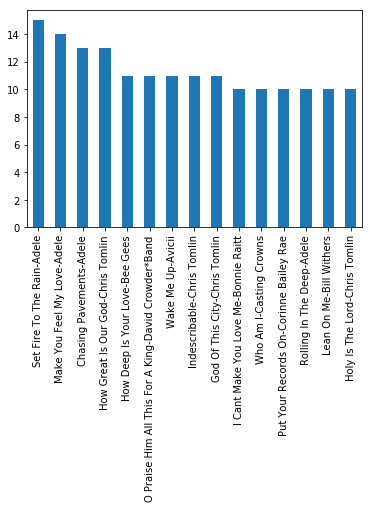

In [78]:
(df['song']+'-'+df['artist']).value_counts().head(15).plot(kind='bar')
# df.song.value_counts().head(10).plot(kind='bar')

Wow Adele really dominates this list, tons of songs with multiple versions.

### Song Difficulties, Tuning, Capo, and Key (Not Finished)

On to the next. These values were all gathered in one field listed at the top of the tab.

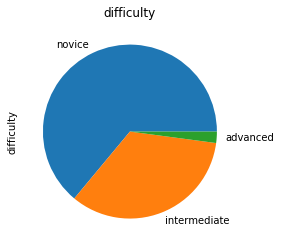

In [79]:
df.difficulty.value_counts().plot(kind='pie', title='difficulty')

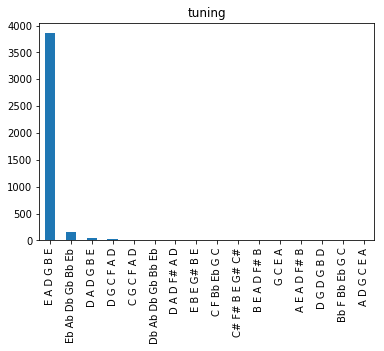

In [80]:
df.tuning.value_counts().plot(kind='bar', title='tuning')

Can we assume that all missing tunings are standard tuning?

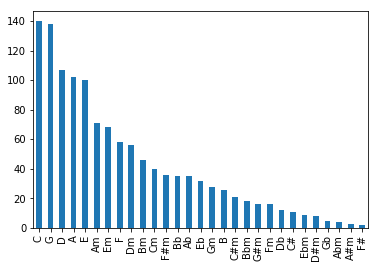

In [81]:
df.key.value_counts().plot(kind='bar')

In [82]:
# use other column to add tunings where missing

# df['other']= df.other.apply(lambda x: x.lower() if isinstance(x, str) else x)
# df.loc[df['other'].str.contains("standard tuning") & df['tuning'].isnull(),
#       'tuning']='E A D G B E'

## Chords

I honestly don't even know where to start with these. I think the best way forward will be to just ask some questions, and try to find answers. That might inform next questions and steps for modeling as well. I'm going to list out some question ideas below.

#### Questions to answer

* What are the most used chords?

* How many chords do most songs have?

* What are the total number of unique chords in all the songs

* What is the most likely chord to happen after another chord?(i.e what transition should you learn)

* How do chords and transitions differ by genre? (how do chords define genres)

* What chords do you need to know for each difficulty level?

* top chords per genre, decade, artist?
* predict the genre or decade based on chords, cardinality, etc?


#### Potential cleaning of chords remaining

* Changing chord names based on capo??
https://www.youtube.com/watch?v=Ky8uOOfI2tY

* Adding key based on chords in song

* Getting numeric notation chord sequence



#### What are the most used chords across all songs?

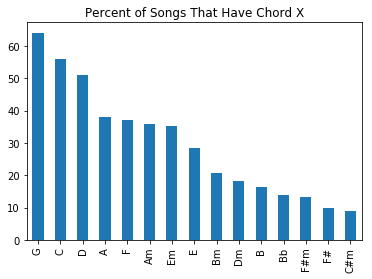

In [83]:
chordList=df.uniqueChords.sum()
((pd.Series(chordList).value_counts().sort_values(ascending=False)/len(df))* 100).head(15).plot(kind='bar', title='Percent of Songs That Have Chord X')

Wow G C and D are all in over 50% of the songs in the DB!

#### How many unique chords are in this database?

In [84]:
uniqueChords=len(list(set(chordList)))
print("There are {} unique chords used across all songs".format(uniqueChords))

There are 1730 unique chords used across all songs


Is this right?? Are there that many unique chords? Maybe we can check by seeing if chords are used across multiple songs? I would assume if they are only used once in the entire DB of 10k songs, it's likely they are just written in a unique way

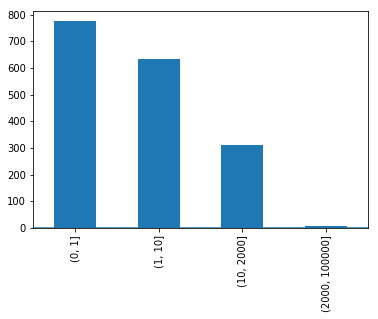

In [85]:
chordCounts=pd.Series(chordList).value_counts().sort_values(ascending=False)
ranges = [0,1,10,2000,100000]
chordCounts.groupby(pd.cut(chordCounts, ranges)).count().plot(kind='bar')

# chordCounts.plot(kind='hist', bins=20)

sns.distplot(chordCounts)


# df.artist.value_counts().plot(kind='hist', bins=25,title='Tabs per artist', edgecolor='k')
# ax = sns.distplot(df.artist.value_counts(),bins=25 ,hist=True, color='b',hist_kws=dict(edgecolor="k", linewidth=2))
# plt.title('Distribution of Tab Count Per Artist') 
# plt.ylabel('Frequency')
# plt.xlabel('Tab Count')

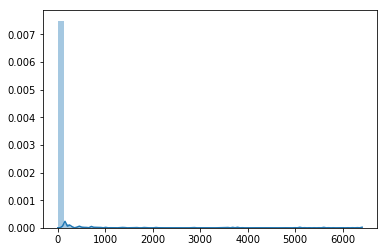

In [86]:
sns.distplot(chordCounts)

https://www.uberchord.com/blog/learn-how-to-read-guitar-chord-chart-symbols/

We might need to consider cleaning these chords up, or at least using some subset of them. Lets keep this in mind as we eye a classification task with chords.

### How many chords do most songs have?


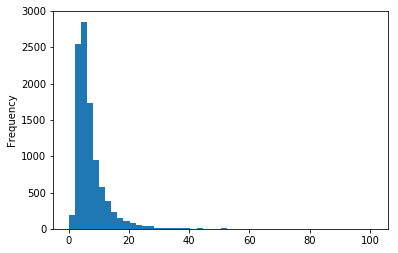

In [87]:
df['cardinality']=df.uniqueChords.apply(lambda x: len(x))
df.cardinality.plot(kind='hist', bins=50)

In [88]:
print('Song Chord Info')
print('Median Cardinality: ', df['cardinality'].median())
print('Max Cardinality: ', df['cardinality'].max())
print('Min Cardinality: ', df['cardinality'].min())

Song Chord Info
Median Cardinality:  6.0
Max Cardinality:  101
Min Cardinality:  0


These cadinality counts are interesting. Looks like we have some data with no chord data at all. We can remove those from our data set. It could also be worth exploring some of these songs with 50 chords! 101 is our max which is really a lot of chords to have for a song...

In [89]:
pd.set_option('display.max_colwidth', -1)
#remove songs with no chords
df=df[df['cardinality']!=0]
# df[df['cardinality']>50]

Do difficult songs have more chords?

In [90]:
# fig, ax = plt.subplots()

# a_heights, a_bins = np.histogram(df[df['difficulty']=='novice'].cardinality)
# b_heights, b_bins = np.histogram(df[df['difficulty']=='advanced'].cardinality, bins=a_bins)

# width = (a_bins[1] - a_bins[0])/3

# ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
# ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

### Do songs often use the same chords?

In [91]:
# dfNov=df[df['difficulty']=='novice']
# dfInt=df[df['difficulty']=='intermediate']
# dfAdv=df[df['difficulty']=='advanced']
# novChords=pd.Series(dfNov.uniqueChords.sum())

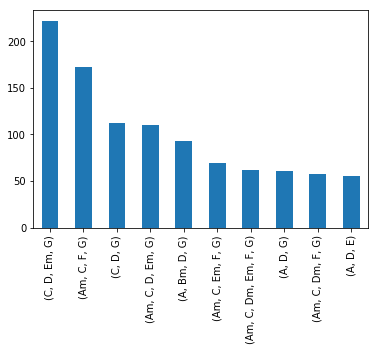

In [92]:
# novChords.value_counts()
df.uniqueChords.apply(sorted).apply(tuple).value_counts().head(10).plot(kind='bar')

In [93]:
df['uniqueChordsTup']=df.uniqueChords.apply(sorted).apply(tuple)

In [94]:
df[df['uniqueChords'].apply(sorted).apply(tuple)==('C','D','Em','G')].difficulty.value_counts()

novice          127
intermediate    18 
advanced        1  
Name: difficulty, dtype: int64

This makes a lot of sense.... It looks like common chord progressions are used in easier songs. I'm guessing harder songs have more unique chords progressions. We can take a look at this at a high level. Lets break down these common chord progressions by the difficulty level they fall in.

Interesting video about the many songs made from this chord progression
https://www.youtube.com/watch?v=2pXS8k1zx8U

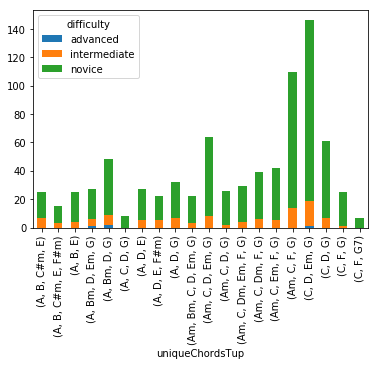

In [95]:
chordGroups=df.uniqueChordsTup.value_counts().head(20)
dfTest=df[df['uniqueChordsTup'].isin(chordGroups.index.to_list())]
dfTest.groupby(['uniqueChordsTup', 'difficulty']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)

Two things...
1) would be nice for this graph to be sorted
2) why is a song difficult with an easy chord progression

In [96]:
# dfTest.groupby(['uniqueChordsTup', 'difficulty']).size().unstack(fill_value=0)

In [97]:
# df[df['uniqueChordsTup']==('C','D','Em','G')]

Can we do this same thing for genres?

In [98]:
# df['genreTup']=df.genre.apply(sorted).apply(tuple)
# dfTest=df[df['uniqueChordsTup'].isin(chordGroups.index.to_list())]
# dfTest.groupby(['uniqueChordsTup', 'genreTup']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)

In [99]:
# dfTest=df[df['uniqueChordsTup'].isin(chordGroups.index.to_list())]
# dfTest.groupby(['uniqueChordsTup', 'genreTup']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)

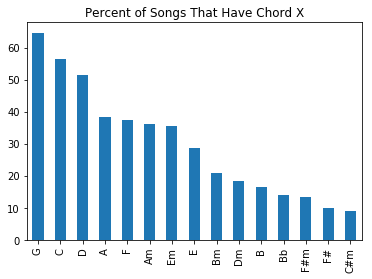

In [100]:
ChordList=df.uniqueChords.sum()
((pd.Series(ChordList).value_counts().sort_values(ascending=False)/len(df))* 100).head(15).plot(kind='bar', title='Percent of Songs That Have Chord X')

#### How many songs do you know by learning x top chords?

In [101]:
# set('G','C')==('C','G')

## Missing Values

- Steal values from other tabs of the same song (genre, decade, etc.) 
- Take data from other column
- Make assumptions about tuning and capo
- Calculate key from chords in song

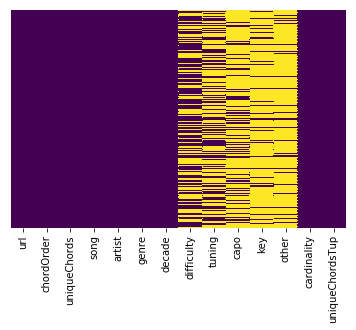

In [102]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Other Column

In [103]:
# temp=df[df.other.notnull()]
# word_list=' '.join(temp['other']).lower().split()
# filtered_words =  pd.Series([word for word in word_list if word not in stopwords.words('english')])
# filtered_words.value_counts()[:100]

#### Other questions

Whats the most difficult genre to play?

In [104]:
df.to_csv("/Users/eshantarneja/Documents/DataScience/data/cleanData/cleanData.csv")

In [106]:
# df.to_pickle("/Users/eshantarneja/Documents/DataScience/data/cleanData/cleanData.pkl")

In [110]:
type(df.loc[0,'chordOrder'])

list

# Convert to number system

Step 1: Clean up chords

Step 2: Get Key

Step 3: Add in numerical index

In [44]:
import re
def clean_chords(chords):
    """
    This function takes in a comma-separated string of 
    chords and cleans it by removing any base note variations, or
    other chord embelishments.  Diminished labels are kept as these
    are used in the chord progression table. The purpose of this
    is to clean the chords to match the labels within the chord
    progression table.
    
    returns:
        new_chords - array of newly cleaned chords to be tabulated
                        by the chord progression table
    """
    
    chords=','.join(chords)
    
    # Pattern grouping: 1=(chord pitch) 2=(base note) 3=(chord type) 4=(base note)
    pattern = "^([A-G]+)(\/[A-G]*[b#])*([(?m)|(?m\d)|(?b\d)|(?#\d)|(?maj\d)|\
    (?add\d)|(?sus\d)|(?aug)|(?aug\d)|(?dim)|(?dim\d)]*)(\/[A-G]*[b#])*"        
    prog = re.compile(pattern)

    pattern2 = "^([A-G])([b#])?(m$|m\d$)?(dim$|dim\d$)?"
    prog2 = re.compile(pattern2)

    chords = chords.split(',')
#     filter out missing chords
    chords = list(filter(None, chords))
    new_chords = [""]*len(chords)
    for i in range(len(chords)):
        try:
            curr_chord = chords[i]
#           fix for parentheses
            curr_chord= re.sub('[()]', '', curr_chord)
#   fix for H chords (they are used in Europe apparently, equivalent to b chords in US)
            curr_chord = re.sub('[H]','B', curr_chord)
            groups = prog.findall(curr_chord)[0] 
            no_base = groups[0] + groups[2]
            no_num = re.sub(pattern="\d", repl="", string=no_base)
            groups = prog2.findall(no_num)[0]
            note,accidental = fix_accidental(groups[0], groups[1])
            new_chords[i] = note + accidental + groups[2] + groups[3]
        except Exception as e:
            print("exception")
            print("curr chord: ", curr_chord)
            print(groups)
            print('-------')

        
    return(new_chords)

def fix_accidental(note, accidental):
    notes = np.asarray(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    note_idx = int(np.where(notes == note)[0])
    if accidental == '#':
        # Account for B# or E#
        if note == 'B':
            return('C', '')
        elif note == 'E':
            return('F', '')
        return(note,accidental)
    elif accidental == 'b':
        # Account for Cb or Fb
        if note == 'C':
            return('B', '')
        elif note == 'F':
            return('E', '')
        return(notes[note_idx - 1],'#')
    else:
        return(note, accidental)
            
df['cleanChordOrder']=df.chordOrder.apply(clean_chords)

In [45]:
list(set(df.loc[1, 'cleanChordOrder']))

['G', 'C', 'Am']

In [46]:
df['cleanUniqueChords']=df.cleanChordOrder.apply(lambda x: list(set(x)))
df.head()

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords
0,https://tabs.ultimate-guitar.com/tab/dolly-parton/its-all-wrong-but-its-all-right-chords-2113377,"[G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, G, G, C, G, C, D, G, C, G]","[G, C, D]",Its All Wrong But Its All Right,Dolly Parton,"(Country,)",1970,NaN,NaN,NaN,NaN,NaN,3,"(C, D, G)","[G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, G, G, C, G, C, D, G, C, G]","[D, G, C]"
1,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-1099394,"[Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am]","[Am, C, G]",Jolene,Dolly Parton,"(Country, Folk)",1970,intermediate,E A D G B E,4th fret,NaN,NaN,3,"(Am, C, G)","[Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Am]","[G, C, Am]"
2,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-1233293,"[Em, G, D, Em, D, Em, Em, G, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, D, Em]","[Em, G, D]",Jolene,Dolly Parton,"(Country,)",1970,novice,E A D G B E,4th fret,NaN,NaN,3,"(D, Em, G)","[Em, G, D, Em, D, Em, Em, G, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, Em, G, D, Em, D, Em, D, Em]","[D, G, Em]"
3,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-165569,"[Dm, F, C, Dm, C, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm]","[Dm, F, C]",Jolene,Dolly Parton,"(Country, Folk)",1970,NaN,NaN,NaN,NaN,NaN,3,"(C, Dm, F)","[Dm, F, C, Dm, C, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm, Dm, F, C, Dm, C, Dm]","[Dm, F, C]"
4,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-183019,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[Am, C, G, Em]",Jolene,Dolly Parton,"(Country, Folk)",1970,novice,E A D G B E,4th fret,C#m,NaN,4,"(Am, C, Em, G)","[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[G, Em, C, Am]"


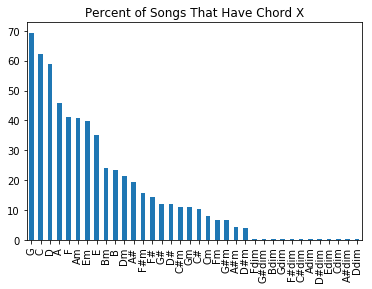

In [47]:
ChordList=df.cleanUniqueChords.sum()
((pd.Series(ChordList).value_counts().sort_values(ascending=False)/len(df))* 100).head(100).plot(kind='bar', title='Percent of Songs That Have Chord X')

In [48]:
pd.Series(ChordList).value_counts()

G        6885
C        6174
D        5857
A        4559
F        4069
Am       4060
Em       3952
E        3471
Bm       2395
B        2315
Dm       2130
A#       1923
F#m      1561
F#       1415
G#       1200
D#       1180
C#m      1092
Gm       1083
C#       1020
Cm       785 
Fm       664 
G#m      644 
A#m      427 
D#m      392 
Fdim     42  
G#dim    41  
Bdim     37  
Gdim     36  
F#dim    35  
C#dim    34  
Adim     33  
D#dim    33  
Cdim     32  
Edim     32  
A#dim    31  
Ddim     30  
dtype: int64

Notes for finding key:

Check commonalities between chords you know are in song and the key

Some times there are ties
tricks for ties

1) 7th chord always has to be 5th chord
2) diminished is a dead give away for chord
3) most popular chord is often the key (not always though)
4) first chords is often the key

https://www.youtube.com/watch?v=Pg-zZEdNg3c&t=63s&ab_channel=SeanDaniel

In [49]:
chordDic= {'A': ['A', 'Bm', 'C#m', 'D', 'E', 'F#', 'G#dim'],
 'Am': ['Am', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G'],
 'B': ['B', 'C#m', 'D#m', 'E', 'F#', 'G#m', 'A#dim'],
 'C': ['C', 'Dm', 'Em', 'F', 'G', 'Am', 'Bdim'],

 'D': ['D', 'Em', 'F#m', 'G', 'A', 'Bm', 'C#dim'],
 'E': ['E', 'F#m', 'G#m', 'A', 'B', 'C#m', 'D#dim'],
 'Em': ['Em', 'F#dim', 'G', 'Am', 'Bm', 'C', 'D'],
 'F': ['F', 'Gm', 'Am', 'Bb', 'C', 'Dm', 'Edim'],
 'G': ['G', 'Am', 'Bm', 'C', 'D', 'Em', 'F#dim']}

#  'Am': ['Am', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G'],
#  'Em': ['Em', 'F#dim', 'G', 'Am', 'Bm', 'C', 'D'],
def findKey(chords):
    keyMax=0
    keys=[]
    finalKey="N/A"
    match=""
    for key, value in chordDic.items():  
        intersect=len(set(chords).intersection(set(value)))
        if intersect>keyMax:
            keys=[key]
            keyMax=intersect
        elif intersect==keyMax and keyMax>0:
            keys.append(key)
    # tiebreaker
    if len(keys)>1:
        maxChord= str(pd.Series(chords).value_counts().sort_values(ascending=False).head(1).index[0])
        firstChord=chords[0]
        lastChord=chords[-1]
        if maxChord in keys:
            finalKey=maxChord
            match="maxChord"
        elif firstChord in keys:
            finalKey=firstChord
            match="firstChord"
        elif lastChord in keys:
            finalKey=lastChord
            match="lastChord"
        else:
            match="tiebreak failed"
            finalKey=keys[0]
    elif len(keys)==1:
        finalKey=keys[0]
        match="one choice"
    else:
        match="no matches"
    return pd.Series([finalKey, keys, match])

dfKeys=df[df.key.notnull()]
dfKeys[['finalKey', 'keyChoices','match']]=dfKeys.cleanChordOrder.apply(lambda x: findKey(x))
dfKeys['keyCheck']=dfKeys[['key','finalKey']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)
missDf=dfKeys[dfKeys['keyCheck']==0]
matchDf=dfKeys[dfKeys['keyCheck']==1]
dfKeys.keyCheck.value_counts(normalize=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    0.621578
1    0.378422
Name: keyCheck, dtype: float64

In [50]:
missDf.key.value_counts()
# missDf.match.value_counts()
# missDf.groupby('key')['match'].apply(lambda x: list(x))
# missDf[missDf['match']=='one choice']
# missDf.fill_null("none").match.value_counts()

Dm     56
E      54
A      52
C      50
Bm     46
Cm     40
F      39
D      37
F#m    36
Bb     35
G      35
Ab     34
Eb     32
Em     30
Am     29
Gm     28
C#m    21
Bbm    18
G#m    16
Fm     16
B      14
Db     12
C#     11
Ebm    9 
D#m    8 
Gb     5 
Abm    4 
A#m    3 
F#     2 
Name: key, dtype: int64

In [51]:
missDf[missDf['key']=='Am']

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords,finalKey,keyChoices,match,keyCheck
710,https://tabs.ultimate-guitar.com/tab/ed-sheeran/give-me-love-chords-1154540,"[G#m7, E, B5, Bmaj7, G#m7, E, B5, B7+, G#m7, E, B5, B7+, G#m7, E, B5, Bmaj7, G#m7, E, B5, Bmaj7, G#m7, E, B5, Bmaj7, G#m7, E, B5, Bmaj7, C#m, E, B, F#, C#m, E, B, C#m, E, B, C#m, E, B, C#m, E, G#m, F#, E, G#m, F#, E, G#m7, E, B5, Bmaj7, G#m7, E, B5, Bmaj7, G#m7, E, B5, Bmaj7, G#m7, E, B5, Bmaj7, C#m, E, B, F#, C#m, E, B, C#m, E, B, C#m, E, B, C#m, E, G#m, F#, E, B, C#m, E, B, C#m, E, B, C#m, E, G#m, F#, E, G#m, F#, G#m, F#, G#m, ...]","[G#m7, E, B5, Bmaj7, B7+, C#m, B, F#, G#m]",Give Me Love,Ed Sheeran,"(Folk,)",2010,novice,E A D G B E,2nd fret,Am,NaN,9,"(B, B5, B7+, Bmaj7, C#m, E, F#, G#m, G#m7)","[G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, C#m, E, B, F#, C#m, E, B, C#m, E, B, C#m, E, B, C#m, E, G#m, F#, E, G#m, F#, E, G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, C#m, E, B, F#, C#m, E, B, C#m, E, B, C#m, E, B, C#m, E, G#m, F#, E, B, C#m, E, B, C#m, E, B, C#m, E, G#m, F#, E, G#m, F#, G#m, F#, G#m, ...]","[G#m, E, F#, C#m, B]",B,[B],one choice,0
714,https://tabs.ultimate-guitar.com/tab/ed-sheeran/happier-chords-1956585,"[Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, Am7, ...]","[Am7, F, C]",Happier,Ed Sheeran,"(Folk,)",2010,novice,E A D G B E,NaN,Am,NaN,3,"(Am7, C, F)","[Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, ...]","[F, C, Am]",C,"[Am, C, F]",maxChord,0
853,https://tabs.ultimate-guitar.com/tab/edguy/holy-shadows-chords-2834503,"[Am, F/A, Dm, C, G, Am, F/A, G, E, Am, F/A, Dm, C, G, Am, F/A, G, Fmaj7, Am, F, G, Am, Am, F, G, E, Am, F, G, Am, Am, F, G, E, Am, F/A, Dm, C, G, Am, F/A, G, E, Am, F/A, Dm, C, G, Am, F/A, G, E, Fmaj7, G6, Am, Am7, C, Bbadd11, Dm, Dm, F, G, Am, Bb, F, C, Dm, C, Bb, Dm, Bb, F, C, Dm, C, Bb, Dm, Bb, F, C, Bb, Am, F, G, Am, Am, F, G, E, Am, F, G, Am, Am, F, G, E, Am, F/A, Dm, ...]","[Am, F/A, Dm, C, G, E, Fmaj7, F, G6, Am7, Bbadd11, Bb, C7, Csus4, Gm, Eb]",Holy Shadows,Edguy,"(Metal,)",1990,intermediate,Eb Ab Db Gb Bb Eb,NaN,Am,"chords to ""holy shadows"" by edguy. was this info helpful?yesno",16,"(Am, Am7, Bb, Bbadd11, C, C7, Csus4, Dm, E, Eb, F, F/A, Fmaj7, G, G6, Gm)","[Am, F, Dm, C, G, Am, F, G, E, Am, F, Dm, C, G, Am, F, G, F, Am, F, G, Am, Am, F, G, E, Am, F, G, Am, Am, F, G, E, Am, F, Dm, C, G, Am, F, G, E, Am, F, Dm, C, G, Am, F, G, E, F, G, Am, Am, C, A#, Dm, Dm, F, G, Am, A#, F, C, Dm, C, A#, Dm, A#, F, C, Dm, C, A#, Dm, A#, F, C, A#, Am, F, G, Am, Am, F, G, E, Am, F, G, Am, Am, F, G, E, Am, F, Dm, ...]","[G, A#, E, Gm, F, Dm, C, D#, Am]",F,"[Am, C, F]",maxChord,0
937,https://tabs.ultimate-guitar.com/tab/electric-light-orchestra/evil-woman-chords-2473478,"[C, C/E, C/G, C9, C, Am, Fmaj7, F9, C/E, Em7, G, F#dim, C/G, Dm7, Emadd9, D#m7, C9, F9, F#dim, C, C, C/E, C/G, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Fmaj7, G, C, C, C/E, C/G, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Em7, Am, Em7, Dm7, Dm7, Em7, Am, Em7, Dm7, Dm7, ...]","[C, C/E, C/G, C9, Am, Fmaj7, F9, Em7, G, F#

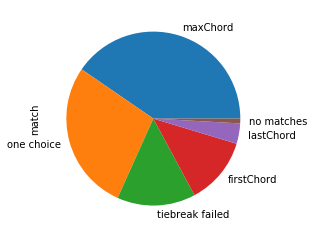

In [52]:
dfKeys.match.fillna("NA").value_counts().plot(kind='pie')

In [53]:
dfKeys.head()

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords,finalKey,keyChoices,match,keyCheck
4,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-183019,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[Am, C, G, Em]",Jolene,Dolly Parton,"(Country, Folk)",1970,novice,E A D G B E,4th fret,C#m,NaN,4,"(Am, C, Em, G)","[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[G, Em, C, Am]",Am,"[Am, C, Em, G]",maxChord,0
11,https://tabs.ultimate-guitar.com/tab/dolly-parton/mama-say-a-prayer-chords-2140773,"[G, D, A, D, D, A, A, G, D, D, D7, G, G, D, A, D, A, G, D, E, A, A7, D, D7, G, D, A, D, G, D, A, D, D, A, A, G, D, D, D7, G, G, D, A, D, A, G, D, E, A, A7, D, D7, G, D, A, D]","[G, D, A, D7, E, A7]",Mama Say A Prayer,Dolly Parton,"(Country,)",1960,novice,E A D G B E,NaN,D,full tab including intro intro and instrumental in original key. was this info helpful?yesno,6,"(A, A7, D, D7, E, G)","[G, D, A, D, D, A, A, G, D, D, D, G, G, D, A, D, A, G, D, E, A, A, D, D, G, D, A, D, G, D, A, D, D, A, A, G, D, D, D, G, G, D, A, D, A, G, D, E, A, A, D, D, G, D, A, D]","[D, E, G, A]",D,"[A, D]",maxChord,1
16,https://tabs.ultimate-guitar.com/tab/dolly-parton/poor-folks-town-chords-2528862,"[E, A, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, E, D, A, E, A, D, A]","[E, A, D]",Poor Folks Town,Dolly Parton,"(Country,)",1980,novice,E A D G B E,NaN,E,for any level guitarist. the chords to this song are nowhere on the internet so here is this. first time doing this and posting. was this info helpful?yesno,3,"(A, D, E)","[E, A, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, E, D, A, E, A, D, A]","[D, E, A]",A,[A],one choice,0
17,https://tabs.ultimate-guitar.com/tab/dolly-parton/randy-chords-2779966,"[D, C, Bm, A, D, A, D, D, D, G, A7, G, D, G, A7, D, D, G, D, A7, G, D, D, G, D, A7, G, D, C, Bm, A, D, G, A7, G, D, D, G, A7, D, D, G, D, A7, G, D, D, G, D, A7, G, D, C, Bm, D]","[D, C, Bm, A, G, A7]",Randy,Dolly Parton,"(Country,)",1970,intermediate,E A D G B E,NaN,D,NaN,6,"(A, A7, Bm, C, D, G)","[D, C, Bm, A, D, A, D, D, D, G, A, G, D, G, A, D, D, G, D, A, G, D, D, G, D, A, G, D, C, Bm, A, D, G, A, G, D, D, G, A, D, D, G, D, A, G, D, D, G, D, A, G, D, C, Bm, D]","[Bm, G, A, C, D]",D,"[D, Em, G]",maxChord,1
20,https://tabs.ultimate-guitar.com/tab/dolly-parton/the-bridge-chords-3211670,"[A, G, A, G, A, D, E, A, A, G, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, D, E, A, A, G, A, G, A, A#, G#, G#/G, A#, G#, A#, A#, G#, G#/G, A#, G#, A#, A#, G#, G#/G, A#, G#, A#, A#, G#, G#/G, A#, G#, A#]","[A, G, D, E, G/F#, A#, G#, G#/G]",The Bridge,Dolly Parton,"(Country,)",1960,NaN,E A D G B E,4th fret,C#,NaN,8,"(A, A#, D, E, G, G#, G#/G, G/F#)","[A, G, A, G, A, D, E, A, A, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, D, E, A, A, G, A, G, A, A#, G#, G

In [54]:

dfKeys['keyCheck']=dfKeys[['key','finalKey']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
dfKeys.head()

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords,finalKey,keyChoices,match,keyCheck
4,https://tabs.ultimate-guitar.com/tab/dolly-parton/jolene-chords-183019,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[Am, C, G, Em]",Jolene,Dolly Parton,"(Country, Folk)",1970,novice,E A D G B E,4th fret,C#m,NaN,4,"(Am, C, Em, G)","[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Em, Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em, Am]","[G, Em, C, Am]",Am,"[Am, C, Em, G]",maxChord,0
11,https://tabs.ultimate-guitar.com/tab/dolly-parton/mama-say-a-prayer-chords-2140773,"[G, D, A, D, D, A, A, G, D, D, D7, G, G, D, A, D, A, G, D, E, A, A7, D, D7, G, D, A, D, G, D, A, D, D, A, A, G, D, D, D7, G, G, D, A, D, A, G, D, E, A, A7, D, D7, G, D, A, D]","[G, D, A, D7, E, A7]",Mama Say A Prayer,Dolly Parton,"(Country,)",1960,novice,E A D G B E,NaN,D,full tab including intro intro and instrumental in original key. was this info helpful?yesno,6,"(A, A7, D, D7, E, G)","[G, D, A, D, D, A, A, G, D, D, D, G, G, D, A, D, A, G, D, E, A, A, D, D, G, D, A, D, G, D, A, D, D, A, A, G, D, D, D, G, G, D, A, D, A, G, D, E, A, A, D, D, G, D, A, D]","[D, E, G, A]",D,"[A, D]",maxChord,1
16,https://tabs.ultimate-guitar.com/tab/dolly-parton/poor-folks-town-chords-2528862,"[E, A, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, E, D, A, E, A, D, A]","[E, A, D]",Poor Folks Town,Dolly Parton,"(Country,)",1980,novice,E A D G B E,NaN,E,for any level guitarist. the chords to this song are nowhere on the internet so here is this. first time doing this and posting. was this info helpful?yesno,3,"(A, D, E)","[E, A, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, A, D, E, A, D, A, E, D, E, D, A, E, A, D, A, E, A, D, A, E, D, E, D, A, E, A, D, A]","[D, E, A]",A,[A],one choice,0
17,https://tabs.ultimate-guitar.com/tab/dolly-parton/randy-chords-2779966,"[D, C, Bm, A, D, A, D, D, D, G, A7, G, D, G, A7, D, D, G, D, A7, G, D, D, G, D, A7, G, D, C, Bm, A, D, G, A7, G, D, D, G, A7, D, D, G, D, A7, G, D, D, G, D, A7, G, D, C, Bm, D]","[D, C, Bm, A, G, A7]",Randy,Dolly Parton,"(Country,)",1970,intermediate,E A D G B E,NaN,D,NaN,6,"(A, A7, Bm, C, D, G)","[D, C, Bm, A, D, A, D, D, D, G, A, G, D, G, A, D, D, G, D, A, G, D, D, G, D, A, G, D, C, Bm, A, D, G, A, G, D, D, G, A, D, D, G, D, A, G, D, D, G, D, A, G, D, C, Bm, D]","[Bm, G, A, C, D]",D,"[D, Em, G]",maxChord,1
20,https://tabs.ultimate-guitar.com/tab/dolly-parton/the-bridge-chords-3211670,"[A, G, A, G, A, D, E, A, A, G, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, G, G/F#, A, G, A, A, D, E, A, A, G, A, G, A, A#, G#, G#/G, A#, G#, A#, A#, G#, G#/G, A#, G#, A#, A#, G#, G#/G, A#, G#, A#, A#, G#, G#/G, A#, G#, A#]","[A, G, D, E, G/F#, A#, G#, G#/G]",The Bridge,Dolly Parton,"(Country,)",1960,NaN,E A D G B E,4th fret,C#,NaN,8,"(A, A#, D, E, G, G#, G#/G, G/F#)","[A, G, A, G, A, D, E, A, A, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, G, G, A, G, A, A, D, E, A, A, G, A, G, A, A#, G#, G

In [56]:
dfKeys.fillna("null").keyCheck.value_counts()

0    772
1    470
Name: keyCheck, dtype: int64

In [57]:
dfKeys.shape[0]

1242

In [58]:
dfKeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 4 to 9993
Data columns (total 20 columns):
url                  1242 non-null object
chordOrder           1242 non-null object
uniqueChords         1242 non-null object
song                 1242 non-null object
artist               1242 non-null object
genre                1242 non-null object
decade               1240 non-null object
difficulty           1049 non-null object
tuning               1207 non-null object
capo                 365 non-null object
key                  1242 non-null object
other                497 non-null object
cardinality          1242 non-null int64
uniqueChordsTup      1242 non-null object
cleanChordOrder      1242 non-null object
cleanUniqueChords    1242 non-null object
finalKey             1242 non-null object
keyChoices           1242 non-null object
match                1242 non-null object
keyCheck             1242 non-null int64
dtypes: int64(2), object(18)
memory usage: 203.8+ KB
